In [13]:
# Reading csv file
import pandas as pd 
import numpy as np 

# Loading train and test datasets
import cv2 
import os

# One - hot Category
from sklearn.preprocessing import LabelEncoder 
from keras.utils.np_utils import to_categorical

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers.core import Flatten, Dense
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D
import visualkeras as vk 
from keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger

import matplotlib.pyplot as plt
from numpy import argmax

from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sn
from tensorflow.keras.utils import plot_model

In [2]:
label=pd.read_csv('./devanagari.csv')
Y_train = np.array(label.iloc[0:46,0:3])
print(Y_train[0:46])

[[1 'ka' 'क']
 [2 'kha' 'ख']
 [3 'ga' 'ग']
 [4 'gha' 'घ']
 [5 'kna' 'ङ']
 [6 'cha' 'च']
 [7 'chha' 'छ']
 [8 'ja' 'ज']
 [9 'jha' 'झ']
 [10 'yna' 'ञ']
 [11 'ta' 'ट']
 [12 'tha' 'ठ']
 [13 'da' 'ड']
 [14 'dha' 'ढ']
 [15 'ana' 'ण']
 [16 'taa' 'त']
 [17 'thaa' 'थ']
 [18 'daa' 'द']
 [19 'dhaa' 'ध']
 [20 'na' 'न']
 [21 'pa' 'प']
 [22 'pha' 'फ']
 [23 'ba' 'ब']
 [24 'bha' 'भ']
 [25 'ma' 'म']
 [26 'ya' 'य']
 [27 'ra' 'र']
 [28 'la' 'ल']
 [29 'va' 'व']
 [30 'motosaw' 'श']
 [31 'petchiryosaw' 'ष']
 [32 'patalosaw' 'स']
 [33 'ha' 'ह']
 [34 'ksha' 'क्ष']
 [35 'tra' 'त्र']
 [36 'gya' 'ज्ञ']
 [37 '0' '०']
 [38 '1' '१']
 [39 '2' '२']
 [40 '3' '३']
 [41 '4' '४']
 [42 '5' '५']
 [43 '6' '६']
 [44 '7' '७']
 [45 '8' '८']
 [46 '9' '९']]


In [3]:
x_train = []
y_train = []

dimension = (28,28)
for j in range(1,47,1):
    for i in range(1,1701,1):
        img = cv2.imread('./1_Training/'+str(j)+'/'+str(j)+' '+ '('+str(i) +')' +'.png')
        gray_image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        x_train.append(gray_image)
        y_train.append(j)
    print(str(j)+'\t')

1	
2	
3	
4	
5	
6	
7	
8	
9	
10	
11	
12	
13	
14	
15	
16	
17	
18	
19	
20	
21	
22	
23	
24	
25	
26	
27	
28	
29	
30	
31	
32	
33	
34	
35	
36	
37	
38	
39	
40	
41	
42	
43	
44	
45	
46	


In [4]:
x_validation = []
y_validation = []

dimension = (28,28)
for j in range(1,47,1):
    for i in range(1,301,1):
        img = cv2.imread('./2_Validation/'+str(j)+'/'+str(j)+' '+ '('+str(i) +')' +'.png')
        gray_image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        x_validation.append(gray_image)
        y_validation.append(j)
    print(str(j)+'\t')

1	
2	
3	
4	
5	
6	
7	
8	
9	
10	
11	
12	
13	
14	
15	
16	
17	
18	
19	
20	
21	
22	
23	
24	
25	
26	
27	
28	
29	
30	
31	
32	
33	
34	
35	
36	
37	
38	
39	
40	
41	
42	
43	
44	
45	
46	


In [5]:
x_test = []
y_test = []

dimension = (28,28)
for j in range(1,47,1):
    for i in range(1,201,1):
        img = cv2.imread('./3_Testing/'+str(j)+'/'+str(j)+' '+ '('+str(i) +')' +'.jpg')
        gray_image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        x_test.append(gray_image)
        y_test.append(j)
    print(str(j)+'\t')

1	
2	
3	
4	
5	
6	
7	
8	
9	
10	
11	
12	
13	
14	
15	
16	
17	
18	
19	
20	
21	
22	
23	
24	
25	
26	
27	
28	
29	
30	
31	
32	
33	
34	
35	
36	
37	
38	
39	
40	
41	
42	
43	
44	
45	
46	


In [6]:
x_train = np.array(x_train)
y_train = np.array(y_train)

x_validation = np.array(x_validation)
y_validation = np.array(y_validation)

x_test = np.array(x_test)
y_test = np.array(y_test)

In [7]:
x_train = x_train.reshape(78200,32,32,1)
x_validation = x_validation.reshape(13800,32,32,1)
x_test = x_test.reshape(9200,32,32,1)

In [8]:
x_train = x_train.astype('float32')
x_validation = x_validation.astype('float32')
x_test = x_test.astype('float32')

In [9]:
x_train = x_train/255.0
x_validation = x_validation/255.0
x_test = x_test/255.0

In [10]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_validation = le.transform(y_validation)
y_test = le.transform(y_test)

y_train = to_categorical(y_train, 46)
y_validation = to_categorical(y_validation, 46)
y_test = to_categorical(y_test, 46)

In [11]:
model = Sequential([
    Conv2D(6, kernel_size=(5, 5),input_shape = (32,32,1), activation="tanh"),
    AveragePooling2D(pool_size=(2,2), strides = 2),
    Conv2D(16, kernel_size=(5,5), activation="tanh"),
    AveragePooling2D(pool_size=(2, 2), strides = 2),
    Conv2D(120, kernel_size=(5,5), activation="tanh"),
    Flatten(),
    Dense(84, activation="tanh"),
    Dense(46, activation="softmax"),
])

In [12]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam',
    metrics=['accuracy']
)

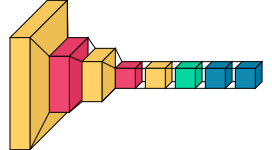

In [14]:
vk.layered_view(model)

In [17]:
plot_model(model, to_file='./lenet_model_plot.png', show_shapes=True, show_layer_names=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [15]:
checkpoint = ModelCheckpoint("./MyCheckpoint/best_model-{epoch:02d}-{val_accuracy:.02f}.h5",monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
log_csv = CSVLogger("./MyLogs/1_Linear_logs.csv", separator=',', append=False)

In [16]:
history = model.fit(x_train,y_train, validation_data=(x_validation,y_validation), verbose=1, epochs = 50, callbacks=[checkpoint,early_stop,log_csv])

Epoch 1/50
2444/2444 [==============================] - ETA: 0s - loss: 0.8615 - accuracy: 0.7772
Epoch 1: val_accuracy improved from -inf to 0.90536, saving model to ./MyCheckpoint\best_model-01-0.91.h5
2444/2444 [==============================] - 21s 8ms/step - loss: 0.8615 - accuracy: 0.7772 - val_loss: 0.3499 - val_accuracy: 0.9054
Epoch 2/50
2439/2444 [============================>.] - ETA: 0s - loss: 0.2709 - accuracy: 0.9224
Epoch 2: val_accuracy improved from 0.90536 to 0.93355, saving model to ./MyCheckpoint\best_model-02-0.93.h5
2444/2444 [==============================] - 21s 9ms/step - loss: 0.2710 - accuracy: 0.9224 - val_loss: 0.2314 - val_accuracy: 0.9336
Epoch 3/50
2443/2444 [============================>.] - ETA: 0s - loss: 0.1806 - accuracy: 0.9455
Epoch 3: val_accuracy improved from 0.93355 to 0.93957, saving model to ./MyCheckpoint\best_model-03-0.94.h5
2444/2444 [==============================] - 21s 9ms/step - loss: 0.1806 - accuracy: 0.9455 - val_loss: 0.2022 - v

In [17]:
scores = model.evaluate(x_train,y_train, verbose=0)
print("Training Accuracy: %.2f%% " % (scores[1]*100))

Training Accuracy: 99.11% 


In [18]:
scores = model.evaluate(x_validation,y_validation, verbose=0)
print("Validation Accuracy: %.2f%% " % (scores[1]*100))

Validation Accuracy: 95.45% 


In [19]:
scores = model.evaluate(x_test,y_test, verbose=0)
print("Test Accuracy: %.2f%% " % (scores[1]*100))

Test Accuracy: 70.50% 


In [26]:
model.load_weights("MyCheckpoint/best_model-16-0.96.h5")
scores = model.evaluate(x_test,y_test)
print("Accuracy: %.2f%% " % (scores[1]*100))

288/288 [==============================] - 1s 4ms/step - loss: 1.4710 - accuracy: 0.7080
Accuracy: 70.80% 


In [27]:
model.save('MyModel/1_lenetCNNModel.h5')

Text(0, 0.5, 'acc')

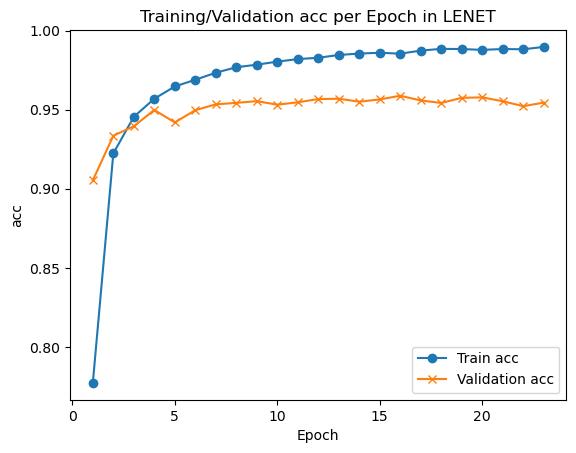

In [21]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot([None] + history.history['accuracy'],'o-')
ax.plot([None] + history.history['val_accuracy'], 'x-')
ax.legend(['Train acc', 'Validation acc'], loc=0)
ax.set_title('Training/Validation acc per Epoch in LENET')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')

Text(0, 0.5, 'Loss')

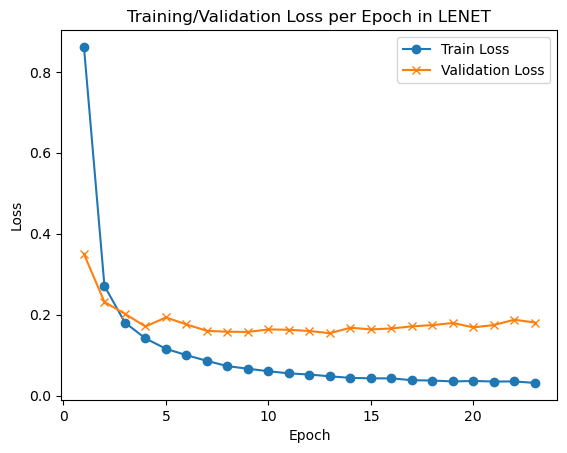

In [22]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot([None] + history.history['loss'],'o-')
ax.plot([None] + history.history['val_loss'], 'x-')
ax.legend(['Train Loss', 'Validation Loss'], loc=0)
ax.set_title('Training/Validation Loss per Epoch in LENET')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

In [23]:
predictions = model.predict(x_test)
confusion = confusion_matrix( np.argmax(y_test, axis=1), np.argmax(predictions, axis=1) )

288/288 [==============================] - 1s 4ms/step


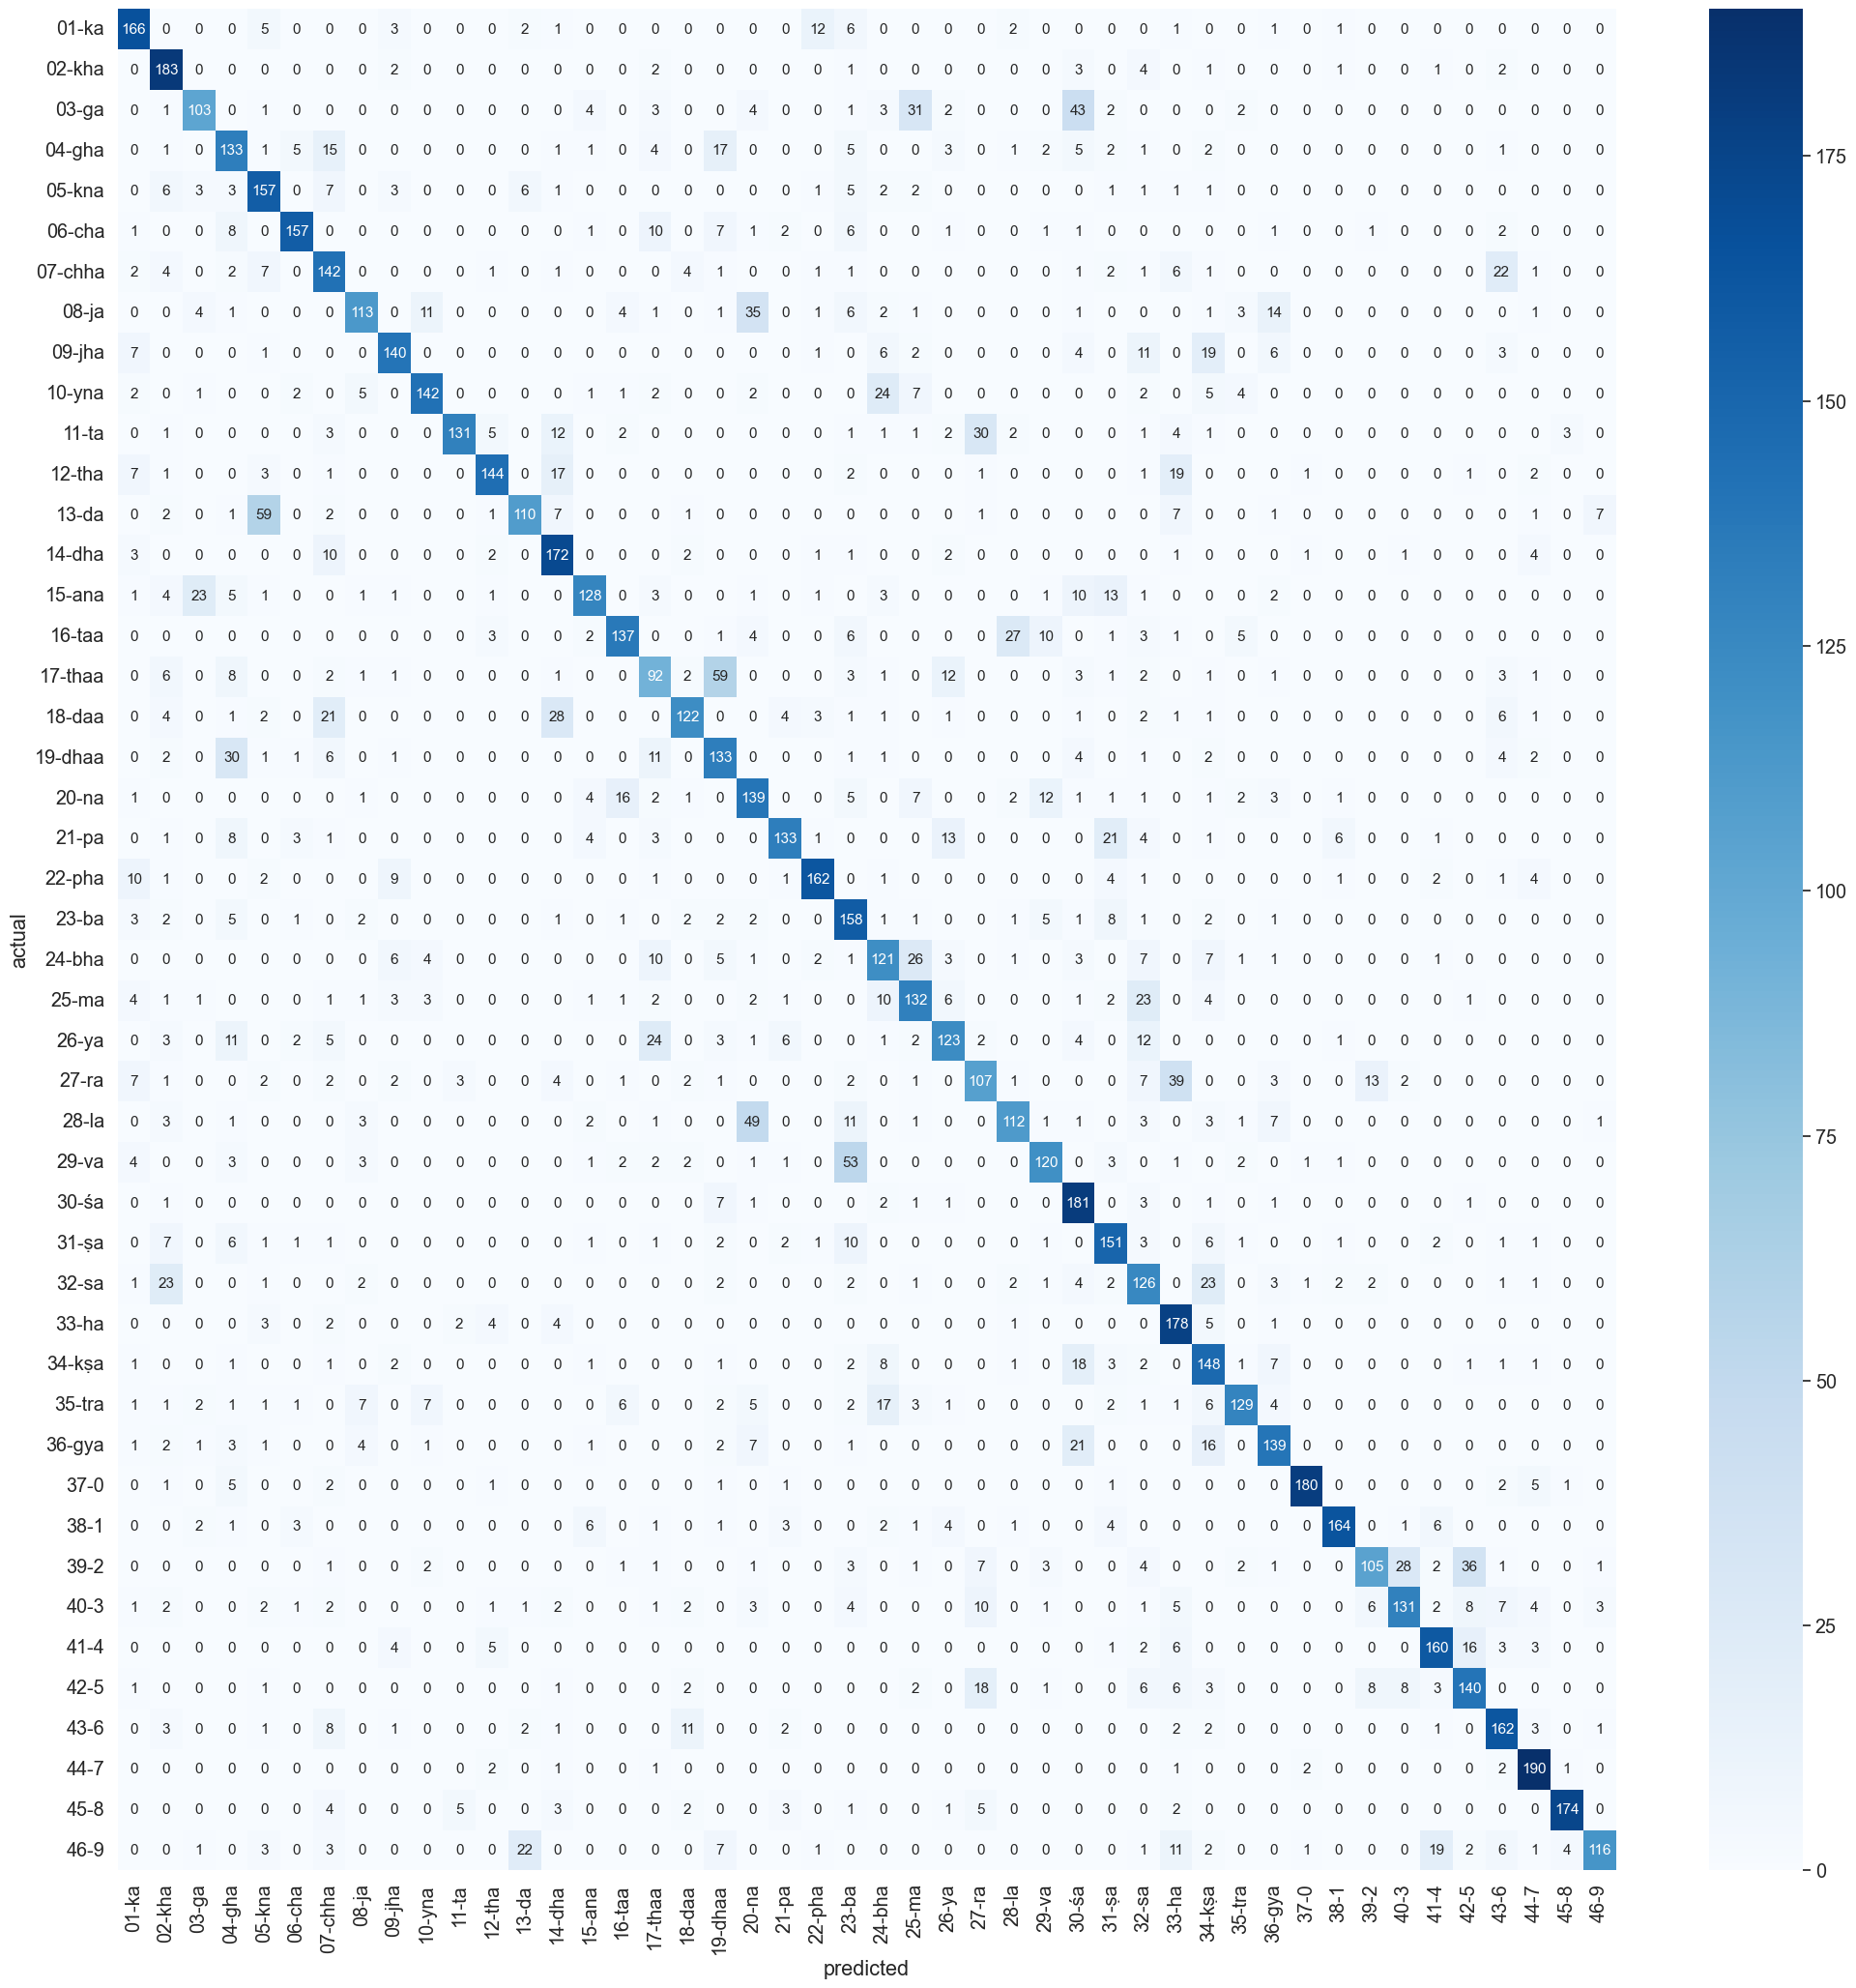

In [24]:
labels = ['01-ka', '02-kha', '03-ga', '04-gha', '05-kna', '06-cha', '07-chha', '08-ja', '09-jha', '10-yna', '11-ta', '12-tha', '13-da', '14-dha', '15-ana', '16-taa', '17-thaa', '18-daa', '19-dhaa', '20-na', '21-pa', '22-pha', '23-ba', '24-bha', '25-ma', '26-ya','27-ra', '28-la', '29-va', '30-śa', '31-ṣa', '32-sa', '33-ha', '34-kṣa','35-tra','36-gya','37-0','38-1','39-2','40-3','41-4','42-5','43-6','44-7','45-8','46-9']

df_cm = pd.DataFrame(confusion, columns=np.unique(labels), index = np.unique(labels))
df_cm.index.name = 'actual'
df_cm.columns.name = 'predicted'
plt.figure(figsize = (25,25))
sn.set(font_scale=1.3) 
sn.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 11}, fmt="d")
plt.show()

In [25]:
print(classification_report( np.argmax(y_test, axis=1),np.argmax(predictions, axis=1)))

              precision    recall  f1-score   support

           0       0.74      0.83      0.78       200
           1       0.69      0.92      0.78       200
           2       0.73      0.52      0.60       200
           3       0.56      0.67      0.61       200
           4       0.61      0.79      0.69       200
           5       0.89      0.79      0.83       200
           6       0.59      0.71      0.64       200
           7       0.79      0.56      0.66       200
           8       0.79      0.70      0.74       200
           9       0.84      0.71      0.77       200
          10       0.93      0.66      0.77       200
          11       0.85      0.72      0.78       200
          12       0.77      0.55      0.64       200
          13       0.67      0.86      0.75       200
          14       0.81      0.64      0.72       200
          15       0.80      0.69      0.74       200
          16       0.52      0.46      0.49       200
          17       0.79    